In [240]:
pip install kmodes

In [241]:
pip install kneed

In [242]:
pip install gradio

In [243]:
import numpy as np
import pandas as pd
from kmodes.kmodes import KModes

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

# from tensorflow.keras.utils import to_categorical

from kneed import KneeLocator

import gradio as gr

import matplotlib.pyplot as plt

import pickle

In [244]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [245]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Final Project/Roomilarity_dataCAT.csv")
data

,ID,Gender,Year Group,How would you describe your personality?,What time do you typically go to bed on weeknights?,Where do you prefer to do homework/study?,What do you enjoy doing for fun?,Do you enjoy having friends over in your room?,How would your friends describe you in one word?
0,1,Male,Class of 2027,Somewhere in between,Between 10PM and Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Friendly
1,2,Male,Class of 2027,Somewhere in between,After Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Friendly
2,3,Male,Class of 2027,I am introverted,10PM or earlier,In the room,Going for events on/off-campus,"Not really, but I don't mind",Friendly
3,4,Male,Class of 2025,I am introverted,After Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Responsible
4,5,Male,Class of 2025,I am extroverted,After Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Friendly
...,...,...,...,...,...,...,...,...,...
500,502,Female,Class of 2027,Somewhere in between,10PM or earlier,In the room,Relaxing/Sleeping,"Not really, but I don't mind",Responsible
501,503,Female,Class of 2027,I am introverted,Between 10PM and Midnight (12AM),Away from the room,Hanging out with friends,"Yup, but not always",Organized
502,504,Female,Class of 2027,I am introverted,Between 10PM and Midnight (12AM),In the room,Hanging out with friends,"Yup, all the time",Fun
503,505,Male,Class of 2026,Somewhere in between,After Midnight (12AM),In the room,Hanging out with friends,"Yup, but not always",Friendly


In [246]:
# Definiton of functions
def select_option(choice):
    return f"You selected: {choice}"

def go_to_main_screen():
    # Hide welcome screen, show main screen, hide options screen
    return gr.update(visible=False), gr.update(visible=True), gr.update(visible=False)

def go_to_options_screen():
    # Hide main screen, hide welcome screen, show options screen
    return gr.update(visible=False), gr.update(visible=False), gr.update(visible=True)

def store_responses(name, dropdownGender, dropdownClass, dropdownDescribe, dropdownBedtime,
                    dropdownStudyLocation, dropdownFun,dropdownFroom,
                    dropdownFriends, compatibility_slider_1,
                    compatibility_slider_2, compatibility_slider_3,
                    compatibility_slider_4, compatibility_slider_5,
                    compatibility_slider_6, compatibility_slider_7):

    personal_info = np.array([name, dropdownGender, dropdownClass, dropdownDescribe,
                              dropdownBedtime, dropdownStudyLocation,
                              dropdownFun,dropdownFroom, dropdownFriends])

    priority_info = np.array([compatibility_slider_1, compatibility_slider_2,
                              compatibility_slider_3, compatibility_slider_4,
                              compatibility_slider_5, compatibility_slider_6,
                              compatibility_slider_7])

    # response_array = np.array(responses)
    # return response_array
    return

In [271]:
data_male = data[data['Gender']=='Male'].copy()
data_male.to_csv("/content/drive/MyDrive/Colab Notebooks/Final Project/Roomilarity_dataCAT-Male.csv",index=False)

data_male

,ID,Gender,Year Group,How would you describe your personality?,What time do you typically go to bed on weeknights?,Where do you prefer to do homework/study?,What do you enjoy doing for fun?,Do you enjoy having friends over in your room?,How would your friends describe you in one word?
0,1,Male,Class of 2027,Somewhere in between,Between 10PM and Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Friendly
1,2,Male,Class of 2027,Somewhere in between,After Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Friendly
2,3,Male,Class of 2027,I am introverted,10PM or earlier,In the room,Going for events on/off-campus,"Not really, but I don't mind",Friendly
3,4,Male,Class of 2025,I am introverted,After Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Responsible
4,5,Male,Class of 2025,I am extroverted,After Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Friendly
...,...,...,...,...,...,...,...,...,...
494,496,Male,Class of 2026,I am extroverted,Between 10PM and Midnight (12AM),In the room,Relaxing/Sleeping,"Not really, but I don't mind","I see more than just one ,I have about 20% of ..."
497,499,Male,Class of 2027,I am introverted,Between 10PM and Midnight (12AM),In the room,Relaxing/Sleeping,Nope!,Friendly
499,501,Male,Class of 2026,Somewhere in between,Between 10PM and Midnight (12AM),In the room,Relaxing/Sleeping,"Not really, but I don't mind",Organized
503,505,Male,Class of 2026,Somewhere in between,After Midnight (12AM),In the room,Hanging out with friends,"Yup, but not always",Friendly


In [248]:
#Converting these records into one hot  vectors
cols = ["Year Group","How would you describe your personality?",
        "What time do you typically go to bed on weeknights?",
        "Where do you prefer to do homework/study?","What do you enjoy doing for fun?",
        "Do you enjoy having friends over in your room?","How would your friends describe you in one word?"]

col_trans = ColumnTransformer(transformers=[('trans',OneHotEncoder(),cols)])

one_hot_male_data = col_trans.fit_transform(data_male)

new_cols = list(col_trans.named_transformers_['trans'].get_feature_names_out(cols))
print(new_cols)

one_hot_male_data.shape
one_hot_male = pd.DataFrame(one_hot_male_data.toarray(), columns=new_cols)
one_hot_male


['Year Group_Class of 2024', 'Year Group_Class of 2025', 'Year Group_Class of 2026', 'Year Group_Class of 2027', 'How would you describe your personality?_I am extroverted', 'How would you describe your personality?_I am introverted', 'How would you describe your personality?_Somewhere in between', 'What time do you typically go to bed on weeknights?_10PM or earlier', 'What time do you typically go to bed on weeknights?_After Midnight (12AM)', 'What time do you typically go to bed on weeknights?_Between 10PM and Midnight (12AM)', 'Where do you prefer to do homework/study?_Away from the room', 'Where do you prefer to do homework/study?_In the room', 'What do you enjoy doing for fun?_Going for events on/off-campus', 'What do you enjoy doing for fun?_Hanging out with friends', 'What do you enjoy doing for fun?_Relaxing/Sleeping', 'Do you enjoy having friends over in your room?_Nope!', "Do you enjoy having friends over in your room?_Not really, but I don't mind", 'Do you enjoy having frien

,Year Group_Class of 2024,Year Group_Class of 2025,Year Group_Class of 2026,Year Group_Class of 2027,How would you describe your personality?_I am extroverted,How would you describe your personality?_I am introverted,How would you describe your personality?_Somewhere in between,What time do you typically go to bed on weeknights?_10PM or earlier,What time do you typically go to bed on weeknights?_After Midnight (12AM),What time do you typically go to bed on weeknights?_Between 10PM and Midnight (12AM),...,"Do you enjoy having friends over in your room?_Yup, all the time","Do you enjoy having friends over in your room?_Yup, but not always",How would your friends describe you in one word?_Chill,How would your friends describe you in one word?_Excellent,How would your friends describe you in one word?_Friendly,How would your friends describe you in one word?_Fun,"How would your friends describe you in one word?_I see more than just one ,I have about 20% of everything there",How would your friends describe you in one word?_Organized,How would your friends describe you in one word?_Reserved,How would your friends describe you in one word?_Responsible
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
208,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
209,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
210,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [249]:
#Creating the priority matrix for the male_category
rows=one_hot_male.shape[0]
columns = one_hot_male.shape[1]
origional_cat_options = [4,3,3,2,3,4,8]

priority_mat_male = np.zeros((rows,columns))

for i in range(rows):
  start = 0
  np.random.seed(i)

  for group in origional_cat_options:
    rand_value = np.random.randint(1,11)
    priority_mat_male[i,start:start+group]=rand_value

    start+=group

priority_mat_male


array([[6., 6., 6., ..., 4., 4., 4.],
       [6., 6., 6., ..., 2., 2., 2.],
       [9., 9., 9., ..., 3., 3., 3.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [8., 8., 8., ..., 2., 2., 2.],
       [7., 7., 7., ..., 8., 8., 8.]])

In [250]:
#multiplying the priorities with the one_hot_encoded data to form weighted vectors for each individual (record)

priority_data_male = one_hot_male*priority_mat_male.copy()
priority_data_male.to_csv("/content/drive/MyDrive/Colab Notebooks/Final Project/Roomilarity_dataCAT-PriorityMale.csv",index=False)
priority_data_male

,Year Group_Class of 2024,Year Group_Class of 2025,Year Group_Class of 2026,Year Group_Class of 2027,How would you describe your personality?_I am extroverted,How would you describe your personality?_I am introverted,How would you describe your personality?_Somewhere in between,What time do you typically go to bed on weeknights?_10PM or earlier,What time do you typically go to bed on weeknights?_After Midnight (12AM),What time do you typically go to bed on weeknights?_Between 10PM and Midnight (12AM),...,"Do you enjoy having friends over in your room?_Yup, all the time","Do you enjoy having friends over in your room?_Yup, but not always",How would your friends describe you in one word?_Chill,How would your friends describe you in one word?_Excellent,How would your friends describe you in one word?_Friendly,How would your friends describe you in one word?_Fun,"How would your friends describe you in one word?_I see more than just one ,I have about 20% of everything there",How would your friends describe you in one word?_Organized,How would your friends describe you in one word?_Reserved,How would your friends describe you in one word?_Responsible
0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,4.0,...,0.0,10.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,6.0,0.0,0.0,9.0,0.0,10.0,0.0,...,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,9.0,0.0,9.0,0.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
3,0.0,9.0,0.0,0.0,0.0,10.0,0.0,0.0,4.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,0.0,8.0,0.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,...,0.0,9.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,0.0,0.0,7.0,0.0,3.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
208,0.0,0.0,0.0,7.0,0.0,5.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
209,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
210,0.0,0.0,8.0,0.0,0.0,0.0,6.0,0.0,7.0,0.0,...,0.0,7.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


In [272]:
data_female = data[data['Gender']=='Female'].copy()
data_female.to_csv("/content/drive/MyDrive/Colab Notebooks/Final Project/Roomilarity_dataCAT-Female.csv",index=False)

data_female

,ID,Gender,Year Group,How would you describe your personality?,What time do you typically go to bed on weeknights?,Where do you prefer to do homework/study?,What do you enjoy doing for fun?,Do you enjoy having friends over in your room?,How would your friends describe you in one word?
6,7,Female,Class of 2025,Somewhere in between,After Midnight (12AM),In the room,Going for events on/off-campus,"Not really, but I don't mind",Friendly
9,10,Female,Class of 2027,Somewhere in between,Between 10PM and Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Friendly
10,11,Female,Class of 2027,Somewhere in between,After Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Responsible
13,14,Female,Class of 2027,I am introverted,Between 10PM and Midnight (12AM),In the room,Hanging out with friends,"Yup, all the time",Chill
14,15,Female,Class of 2027,Somewhere in between,Between 10PM and Midnight (12AM),Away from the room,Relaxing/Sleeping,"Yup, but not always",Fun
...,...,...,...,...,...,...,...,...,...
496,498,Female,Class of 2026,Somewhere in between,After Midnight (12AM),Away from the room,Relaxing/Sleeping,Nope!,Friendly
498,500,Female,Class of 2026,Somewhere in between,After Midnight (12AM),Away from the room,Relaxing/Sleeping,"Not really, but I don't mind",Organized
500,502,Female,Class of 2027,Somewhere in between,10PM or earlier,In the room,Relaxing/Sleeping,"Not really, but I don't mind",Responsible
501,503,Female,Class of 2027,I am introverted,Between 10PM and Midnight (12AM),Away from the room,Hanging out with friends,"Yup, but not always",Organized


In [252]:
cols = ["Year Group","How would you describe your personality?",
        "What time do you typically go to bed on weeknights?",
        "Where do you prefer to do homework/study?","What do you enjoy doing for fun?",
        "Do you enjoy having friends over in your room?","How would your friends describe you in one word?"]

col_trans = ColumnTransformer(transformers=[('trans',OneHotEncoder(),cols)])

one_hot_female_data = col_trans.fit_transform(data_female)

new_cols = list(col_trans.named_transformers_['trans'].get_feature_names_out(cols))
# print(new_cols)

one_hot_female_data.shape
one_hot_female = pd.DataFrame(one_hot_female_data.toarray(), columns=new_cols)
one_hot_female

,Year Group_Class of 2024,Year Group_Class of 2025,Year Group_Class of 2026,Year Group_Class of 2027,Year Group_class of 2024,How would you describe your personality?_I am extroverted,How would you describe your personality?_I am introverted,How would you describe your personality?_Somewhere in between,What time do you typically go to bed on weeknights?_10PM or earlier,What time do you typically go to bed on weeknights?_After Midnight (12AM),...,How would your friends describe you in one word?_All the above mentioned,How would your friends describe you in one word?_Calm,How would your friends describe you in one word?_Chill,How would your friends describe you in one word?_Friendly,How would your friends describe you in one word?_Fun,How would your friends describe you in one word?_No idea,How would your friends describe you in one word?_Organized,How would your friends describe you in one word?_Responsible,How would your friends describe you in one word?_Unsociable,"How would your friends describe you in one word?_fun, responsible and organized"
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
289,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
290,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
291,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [253]:
#Correcting the entries
one_hot_female["Year Group_Class of 2024"] = one_hot_female["Year Group_Class of 2024"]+one_hot_female["Year Group_class of 2024"]
one_hot_female = one_hot_female.drop(["Year Group_class of 2024"],axis = 1)

In [254]:
rows=one_hot_female.shape[0]
columns = one_hot_female.shape[1]
origional_cat_options = [4,3,3,2,3,4,10]

priority_mat_female = np.zeros((rows,columns))

# np.random.seed(51)
for i in range(rows):
  start = 0
  np.random.seed(1000-i)

  for group in origional_cat_options:
    rand_value = np.random.randint(1,11)
    priority_mat_female[i,start:start+group]=rand_value

    start+=group

priority_mat_female

array([[ 4.,  4.,  4., ..., 10., 10., 10.],
       [ 1.,  1.,  1., ...,  4.,  4.,  4.],
       [ 7.,  7.,  7., ...,  5.,  5.,  5.],
       ...,
       [ 7.,  7.,  7., ...,  7.,  7.,  7.],
       [ 8.,  8.,  8., ...,  1.,  1.,  1.],
       [ 9.,  9.,  9., ...,  5.,  5.,  5.]])

In [255]:
priority_data_female = one_hot_female*priority_mat_female.copy()
priority_data_female.to_csv("/content/drive/MyDrive/Colab Notebooks/Final Project/Roomilarity_dataCAT-PriorityFemale.csv",index=False)
priority_data_female

,Year Group_Class of 2024,Year Group_Class of 2025,Year Group_Class of 2026,Year Group_Class of 2027,How would you describe your personality?_I am extroverted,How would you describe your personality?_I am introverted,How would you describe your personality?_Somewhere in between,What time do you typically go to bed on weeknights?_10PM or earlier,What time do you typically go to bed on weeknights?_After Midnight (12AM),What time do you typically go to bed on weeknights?_Between 10PM and Midnight (12AM),...,How would your friends describe you in one word?_All the above mentioned,How would your friends describe you in one word?_Calm,How would your friends describe you in one word?_Chill,How would your friends describe you in one word?_Friendly,How would your friends describe you in one word?_Fun,How would your friends describe you in one word?_No idea,How would your friends describe you in one word?_Organized,How would your friends describe you in one word?_Responsible,How would your friends describe you in one word?_Unsociable,"How would your friends describe you in one word?_fun, responsible and organized"
0,0.0,4.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,2.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,7.0,0.0,0.0,10.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
3,0.0,0.0,0.0,5.0,0.0,7.0,0.0,0.0,0.0,6.0,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,10.0,0.0,0.0,10.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,0.0,0.0,7.0,0.0,0.0,0.0,6.0,0.0,5.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
289,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
290,0.0,0.0,0.0,7.0,0.0,0.0,2.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
291,0.0,0.0,0.0,8.0,0.0,1.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [256]:
encoder = OrdinalEncoder()
encoded_data_male =encoder.fit_transform(data_male)
encoded_data_female =encoder.fit_transform(data_female)
distance_matrix_male = pairwise_distances(encoded_data_male,metric='hamming')
distance_matrix_female = pairwise_distances(encoded_data_female,metric='hamming')

In [257]:
male_cluster_cost = []
female_cluster_cost = []
m_Sscore = []
f_Sscore = []
s_values = []
count = 2

for i in  range(2,100):
  kmodes = KModes(n_clusters = i,init='Huang', max_iter = 300, random_state=42,verbose = 1)
  clusters_male = kmodes.fit_predict(data_male.drop("ID",axis=1))
  male_cluster_cost.append(kmodes.cost_)

  clusters_female = kmodes.fit_predict(data_female.drop("ID",axis=1))
  female_cluster_cost.append(kmodes.cost_)

  score_male = silhouette_score(distance_matrix_male,clusters_male,metric="precomputed")
  score_female = silhouette_score(distance_matrix_female,clusters_female,metric="precomputed")

  m_Sscore.append(score_male)
  f_Sscore.append(score_female)
  s_values.append(count)
  count+=1

Streaming output truncated to the last 5000 lines.
Run 9, iteration: 2/300, moves: 3, cost: 207.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 10, iteration: 1/300, moves: 40, cost: 186.0
Run 10, iteration: 2/300, moves: 2, cost: 186.0
Best run was number 10
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/300, moves: 35, cost: 272.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/300, moves: 54, cost: 263.0
Run 2, iteration: 2/300, moves: 2, cost: 263.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/300, moves: 37, cost: 279.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/300, moves: 22, cost: 284.0
Run 4, iteration: 2/300, moves: 6, cost: 284.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration

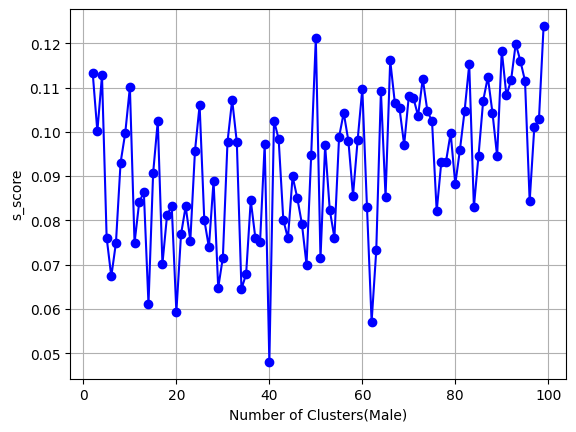

In [258]:
plt.plot(s_values,m_Sscore,'o-',color = 'blue')
plt.xlabel('Number of Clusters(Male)')
plt.ylabel('s_score')
plt.grid()
plt.show()

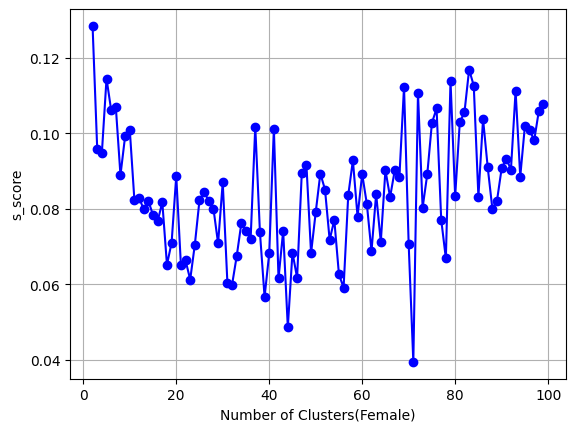

In [259]:
plt.plot(s_values,f_Sscore,'o-',color = 'blue')
plt.xlabel('Number of Clusters(Female)')
plt.ylabel('s_score')
plt.grid()
plt.show()

Best number of clusters (elbow method): 16


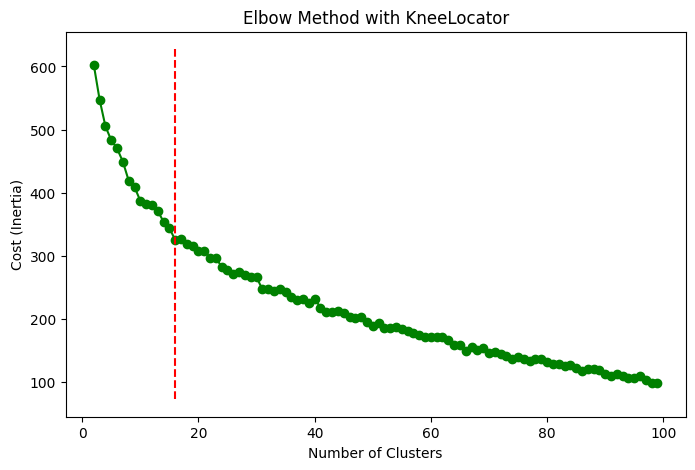

In [260]:
male_knee = KneeLocator(s_values, male_cluster_cost, curve="convex", direction="decreasing")
male_centroids = male_knee.knee
print(f"Best number of clusters (elbow method): {male_centroids}")

plt.figure(figsize=(8,5))
plt.plot(s_values, male_cluster_cost, 'go-')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost (Inertia)')
plt.title('Elbow Method with KneeLocator')
plt.vlines(male_centroids, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red')
plt.show()

Best number of clusters (elbow method): 17


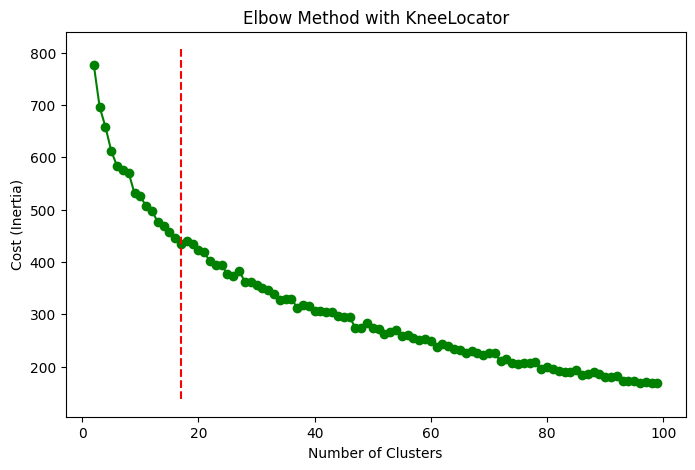

In [261]:
female_knee = KneeLocator(s_values, female_cluster_cost, curve="convex", direction="decreasing")
female_centroids = female_knee.knee
print(f"Best number of clusters (elbow method): {female_centroids}")

plt.figure(figsize=(8,5))
plt.plot(s_values, female_cluster_cost, 'go-')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost (Inertia)')
plt.title('Elbow Method with KneeLocator')
plt.vlines(female_centroids, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red')
plt.show()

In [273]:
data_male

,ID,Gender,Year Group,How would you describe your personality?,What time do you typically go to bed on weeknights?,Where do you prefer to do homework/study?,What do you enjoy doing for fun?,Do you enjoy having friends over in your room?,How would your friends describe you in one word?
0,1,Male,Class of 2027,Somewhere in between,Between 10PM and Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Friendly
1,2,Male,Class of 2027,Somewhere in between,After Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Friendly
2,3,Male,Class of 2027,I am introverted,10PM or earlier,In the room,Going for events on/off-campus,"Not really, but I don't mind",Friendly
3,4,Male,Class of 2025,I am introverted,After Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Responsible
4,5,Male,Class of 2025,I am extroverted,After Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Friendly
...,...,...,...,...,...,...,...,...,...
494,496,Male,Class of 2026,I am extroverted,Between 10PM and Midnight (12AM),In the room,Relaxing/Sleeping,"Not really, but I don't mind","I see more than just one ,I have about 20% of ..."
497,499,Male,Class of 2027,I am introverted,Between 10PM and Midnight (12AM),In the room,Relaxing/Sleeping,Nope!,Friendly
499,501,Male,Class of 2026,Somewhere in between,Between 10PM and Midnight (12AM),In the room,Relaxing/Sleeping,"Not really, but I don't mind",Organized
503,505,Male,Class of 2026,Somewhere in between,After Midnight (12AM),In the room,Hanging out with friends,"Yup, but not always",Friendly


In [286]:
M_kmodes = KModes(n_clusters = male_centroids, max_iter = 300, random_state=42,verbose = 1)
M_kmodes.fit(data_male.drop("ID",axis=1))
male_clusters=M_kmodes.predict(data_male.drop("ID",axis=1))
data_male['cluster'] = male_clusters
priority_data_male['cluster'] = male_clusters

# priority_data_male.to_csv("/content/drive/MyDrive/Colab Notebooks/Final Project/Roomilarity_dataCAT-PriorityMale.csv",index=False)
# data_male.to_csv("/content/drive/MyDrive/Colab Notebooks/Final Project/Roomilarity_dataCAT-Male.csv",index=False)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/300, moves: 5, cost: 347.0


In [285]:
F_kmodes = KModes(n_clusters = female_centroids, max_iter = 300, random_state=42,verbose = 1)
F_kmodes.fit(data_female.drop("ID",axis=1))
female_clusters=F_kmodes.predict(data_female.drop("ID",axis=1))

data_female['cluster'] = female_clusters
priority_data_female['cluster'] = female_clusters

# priority_data_female.to_csv("/content/drive/MyDrive/Colab Notebooks/Final Project/Roomilarity_dataCAT-PriorityFemale.csv",index=False)
# data_female.to_csv("/content/drive/MyDrive/Colab Notebooks/Final Project/Roomilarity_dataCAT-Female.csv",index=False)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/300, moves: 26, cost: 440.0
Run 1, iteration: 2/300, moves: 2, cost: 440.0


In [265]:
#exporting the kmodes model

with open('/content/drive/MyDrive/Colab Notebooks/Final Project/F_kmodes_model.pkl', 'wb') as file:
    pickle.dump(F_kmodes, file)
with open('/content/drive/MyDrive/Colab Notebooks/Final Project/M_kmodes_model.pkl', 'wb') as file:
    pickle.dump(M_kmodes,file)

In [284]:
data_male[data_male['cluster']==0]

,ID,Gender,Year Group,How would you describe your personality?,What time do you typically go to bed on weeknights?,Where do you prefer to do homework/study?,What do you enjoy doing for fun?,Do you enjoy having friends over in your room?,How would your friends describe you in one word?,cluster
1,2,Male,Class of 2027,Somewhere in between,After Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Friendly,0
25,26,Male,Class of 2026,Somewhere in between,After Midnight (12AM),Away from the room,Relaxing/Sleeping,"Yup, all the time",Chill,0
74,75,Male,Class of 2025,Somewhere in between,After Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Organized,0
76,77,Male,Class of 2027,Somewhere in between,10PM or earlier,In the room,Relaxing/Sleeping,Nope!,Responsible,0
85,86,Male,Class of 2026,Somewhere in between,After Midnight (12AM),In the room,Hanging out with friends,"Yup, but not always",Excellent,0
110,111,Male,Class of 2027,Somewhere in between,After Midnight (12AM),In the room,Hanging out with friends,"Yup, but not always",Friendly,0
114,115,Male,Class of 2026,Somewhere in between,After Midnight (12AM),Away from the room,Relaxing/Sleeping,"Yup, but not always",Chill,0
125,127,Male,Class of 2026,Somewhere in between,After Midnight (12AM),In the room,Relaxing/Sleeping,"Yup, but not always",Organized,0
183,185,Male,Class of 2025,Somewhere in between,After Midnight (12AM),Away from the room,Relaxing/Sleeping,"Yup, but not always",Chill,0
192,194,Male,Class of 2027,I am introverted,After Midnight (12AM),Away from the room,Relaxing/Sleeping,"Yup, but not always",Chill,0


In [267]:
data_female[data_female['cluster']==0]

,ID,Gender,Year Group,How would you describe your personality?,What time do you typically go to bed on weeknights?,Where do you prefer to do homework/study?,What do you enjoy doing for fun?,Do you enjoy having friends over in your room?,How would your friends describe you in one word?,cluster


In [268]:
group = 0
student = 0

wanted_one_hot_data = priority_data_female[priority_data_female['cluster']==group]

similarity_matrix = cosine_similarity(wanted_one_hot_data)
np.fill_diagonal(similarity_matrix, 0)
compatibility =[]


for i in range(similarity_matrix[student].shape[0]):
  compatibility.append(similarity_matrix[student][i]*100)
  if i != student:
    print(f"student {student} is {similarity_matrix[student][i]*100:.2f} % compatible with student {i}")

ValueError: Found array with 0 sample(s) (shape=(0, 30)) while a minimum of 1 is required by check_pairwise_arrays.

In [ ]:
wanted_data = data_female[data_female['cluster']==group].copy()
wanted_data["Compatibility (%)"] = compatibility

wanted_data.sort_values(by='Compatibility (%)',ascending=False,inplace=True)
wanted_data


In [283]:
group = M_kmodes.predict(np.array([["Male","Class of 2027",	"I am introverted",
                                    "10PM or earlier","In the room","Going for events on/off-campus",
                                    "Not really, but I don't mind",	"Friendly"]]))

print(group)
print(M_kmodes.cluster_centroids_[group])

[4]
[['Male' 'Class of 2027' 'I am introverted' '10PM or earlier'
  'In the room' 'Relaxing/Sleeping' "Not really, but I don't mind"
  'Organized']]


In [281]:
data_male[data_male['cluster']==4]

,ID,Gender,Year Group,How would you describe your personality?,What time do you typically go to bed on weeknights?,Where do you prefer to do homework/study?,What do you enjoy doing for fun?,Do you enjoy having friends over in your room?,How would your friends describe you in one word?,cluster
2,3,Male,Class of 2027,I am introverted,10PM or earlier,In the room,Going for events on/off-campus,"Not really, but I don't mind",Friendly,4
77,78,Male,Class of 2027,I am extroverted,10PM or earlier,Away from the room,Relaxing/Sleeping,"Yup, all the time",Organized,4
188,190,Male,Class of 2027,I am extroverted,10PM or earlier,In the room,Relaxing/Sleeping,"Not really, but I don't mind",Organized,4
199,201,Male,Class of 2027,I am introverted,After Midnight (12AM),In the room,Relaxing/Sleeping,"Not really, but I don't mind",Responsible,4
278,280,Male,Class of 2027,I am introverted,Between 10PM and Midnight (12AM),In the room,Relaxing/Sleeping,"Not really, but I don't mind",Organized,4
340,342,Male,Class of 2026,Somewhere in between,10PM or earlier,In the room,Relaxing/Sleeping,"Not really, but I don't mind",Organized,4
347,349,Male,Class of 2027,I am introverted,10PM or earlier,In the room,Hanging out with friends,"Yup, but not always",Organized,4
378,380,Male,Class of 2027,I am introverted,10PM or earlier,In the room,Relaxing/Sleeping,"Yup, all the time",Fun,4
433,435,Male,Class of 2027,Somewhere in between,10PM or earlier,In the room,Relaxing/Sleeping,"Not really, but I don't mind",Fun,4
445,447,Male,Class of 2026,I am introverted,10PM or earlier,In the room,Relaxing/Sleeping,"Not really, but I don't mind",Organized,4
